# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from ddpg_agent import Agent

# imports for rendering outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

### 2. Instantiate the Environment and Agent

In [5]:
env = gym.make('Pendulum-v0')
env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)

In [6]:
print ("action space: {} ... state space: {}".format(env.action_space,env.observation_space))

action space: Box(1,) ... state space: Box(3,)


In [7]:
env.action_space.high, env.action_space.low

(array([2.], dtype=float32), array([-2.], dtype=float32))

In [8]:
# lets play a random episode

state = env.reset()
done = False
step = 0
while (not done):
    action = env.action_space.sample()
    next_state,reward,done,_= env.step(action)
    
    print ("step: {} ... state: {} ... action: {} ... reward: {:.2f} ... done: {}".format(step,state,
                                                                                      action,reward,done))  
    state = next_state
    step+=1

step: 0 ... state: [0.83465323 0.55077581 0.43384926] ... action: [0.19525401] ... reward: -0.36 ... done: False
step: 1 ... state: [0.80973004 0.58680258 0.87621922] ... action: [0.86075747] ... reward: -0.47 ... done: False
step: 2 ... state: [0.76524393 0.64374042 1.44543478] ... action: [0.4110535] ... reward: -0.70 ... done: False
step: 3 ... state: [0.69751612 0.71656909 1.98989812] ... action: [0.17953274] ... reward: -1.03 ... done: False
step: 4 ... state: [0.60056898 0.79957295 2.55425485] ... action: [-0.3053808] ... reward: -1.51 ... done: False
step: 5 ... state: [0.46957218 0.88289408 3.10812744] ... action: [0.58357644] ... reward: -2.14 ... done: False
step: 6 ... state: [0.29161466 0.95653588 3.85783447] ... action: [-0.24965115] ... reward: -3.11 ... done: False
step: 7 ... state: [0.0689702  0.99761872 4.53778871] ... action: [1.5670921] ... reward: -4.32 ... done: False
step: 8 ... state: [-0.2055526   0.97864607  5.52106656] ... action: [1.8546511] ... reward: -6.2

### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [9]:
def ddpg(n_episodes=2000, max_t=200):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        if (score > max_score):
            max_score=score
        #print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {} ... Average reward: {:.2f} ... Max_reward: {:.2f}'.format(i_episode, np.mean(scores_deque),max_score))   
    return scores

scores = ddpg()

/home/parminder0407/anaconda3/envs/cv3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Episode 100 ... Average reward: -1491.11 ... Max_reward: -1016.99
Episode 200 ... Average reward: -746.51 ... Max_reward: -1.64
Episode 300 ... Average reward: -285.81 ... Max_reward: -0.90
Episode 400 ... Average reward: -334.94 ... Max_reward: -0.90
Episode 500 ... Average reward: -284.30 ... Max_reward: -0.72
Episode 600 ... Average reward: -238.97 ... Max_reward: -0.72
Episode 700 ... Average reward: -178.73 ... Max_reward: -0.72
Episode 800 ... Average reward: -342.03 ... Max_reward: -0.72
Episode 900 ... Average reward: -237.58 ... Max_reward: -0.39
Episode 1000 ... Average reward: -338.69 ... Max_reward: -0.39
Episode 1100 ... Average reward: -240.65 ... Max_reward: -0.39
Episode 1200 ... Average reward: -190.41 ... Max_reward: -0.39
Episode 1300 ... Average reward: -285.36 ... Max_reward: -0.39
Episode 1400 ... Average reward: -195.26 ... Max_reward: -0.32
Episode 1500 ... Average reward: -373.68 ... Max_reward: -0.32
Episode 1600 ... Average reward: -378.18 ... Max_reward: -0.

In [ ]:
# n_episodes=2000
# max_t=200
# scores_deque = deque(maxlen=100)
# scores = []
# max_score = -np.Inf
# for i_episode in range(1, n_episodes+1):
#     state = env.reset()
#     agent.reset()
#     score = 0
#     for t in range(max_t):
#         action = agent.act(state)
#         next_state, reward, done, _ = env.step(action)
#         agent.step(state, action, reward, next_state, done)
#         state = next_state
#         score += reward
#         if done:
#             break 
#     scores_deque.append(score)
#     scores.append(score)
#     if (score > max_score):
#         max_score=score
#     #print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
#     if i_episode % 100 == 0:
#         torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#         torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
#         print('\rEpisode {} ... Average reward: {:.2f} ... Max_reward: {:.2f}'.format(i_episode, 
#                                                                         np.mean(scores_deque),max_score))

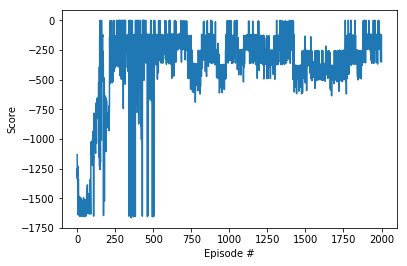

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [9]:
# function to animate a list of frames
def animate_frames(frames):
    plt.figure(dpi = 72)
    plt.axis('off')

    # color option for plotting
    # use Greys for greyscale
    cmap = None if len(frames[0].shape)==3 else 'Greys'
    patch = plt.imshow(frames[0], cmap=cmap)  

    fanim = animation.FuncAnimation(plt.gcf(), \
        lambda x: patch.set_data(frames[x]), frames = len(frames), interval=30)
    
    display(display_animation(fanim, default_mode='once'))


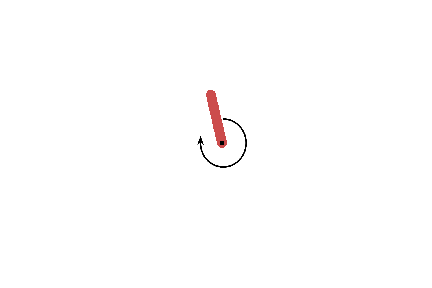
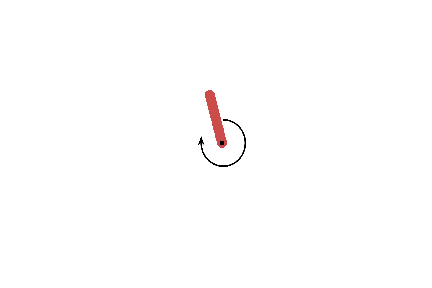
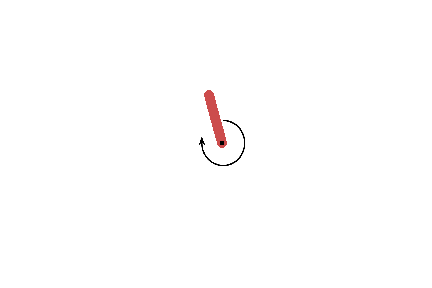
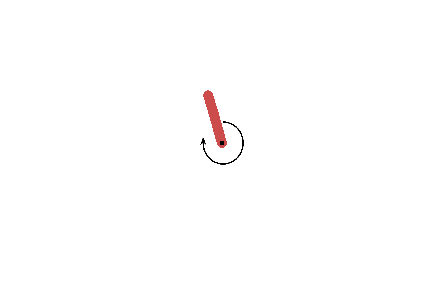
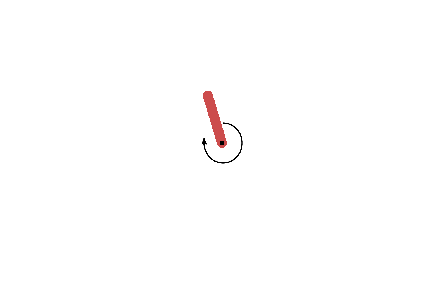
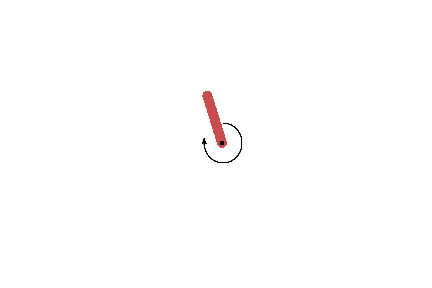
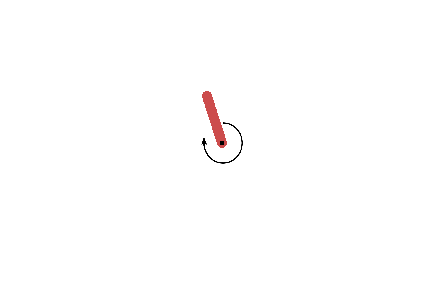
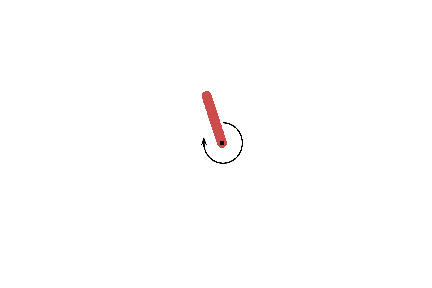
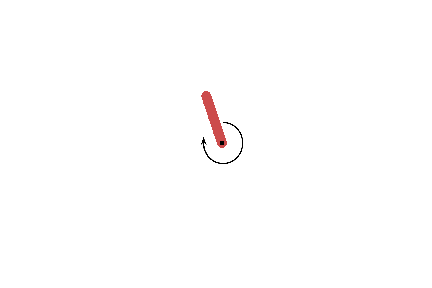
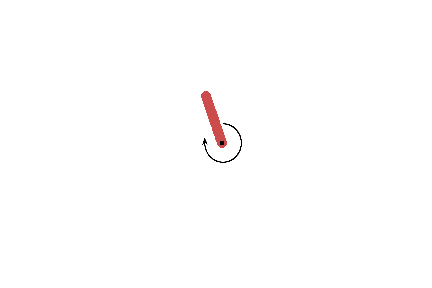
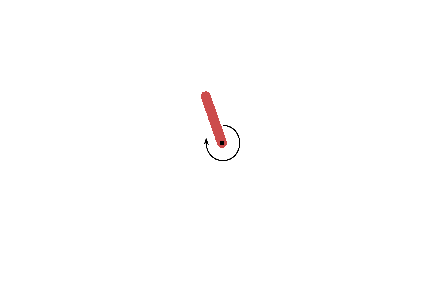
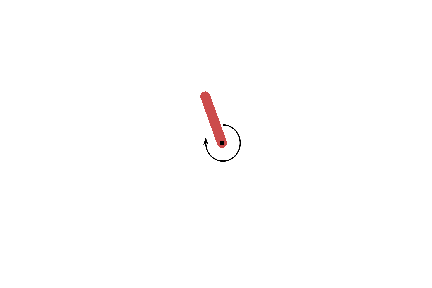
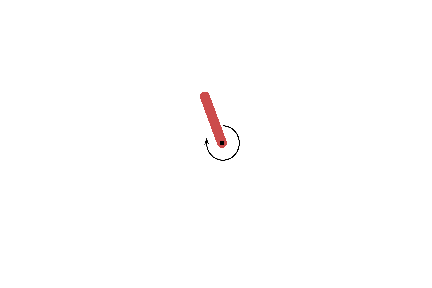
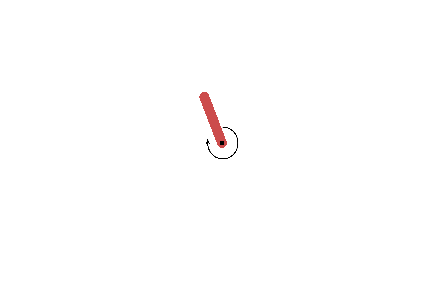
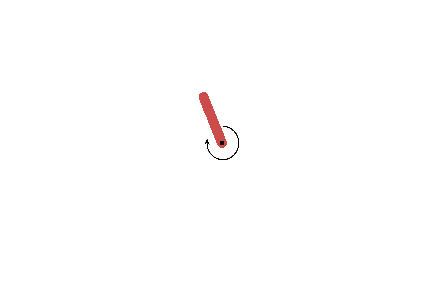
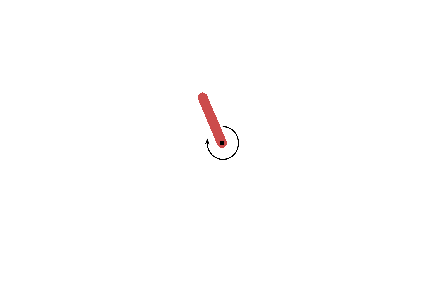
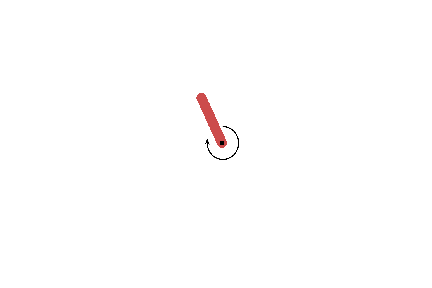
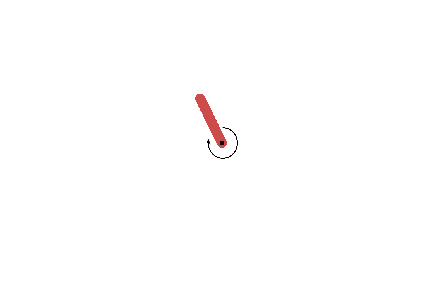
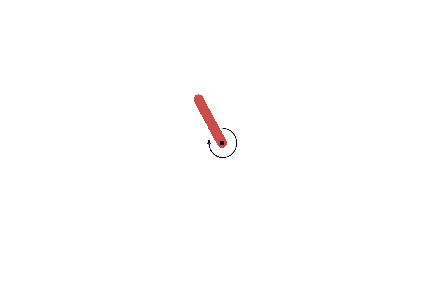
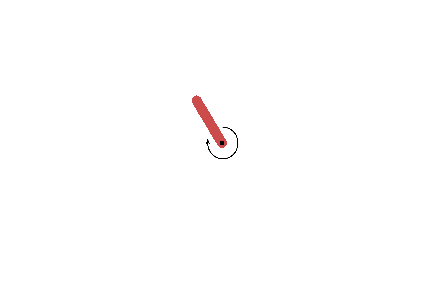
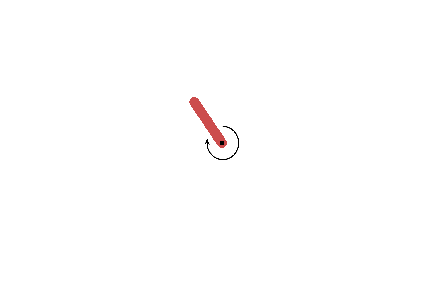
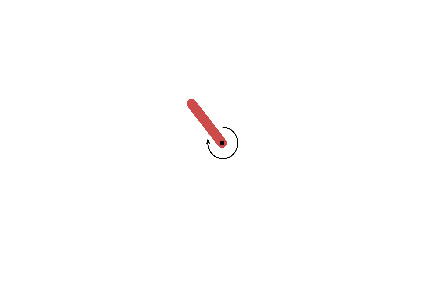
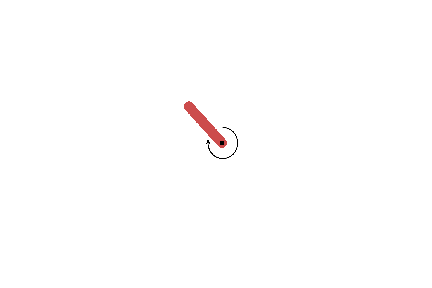
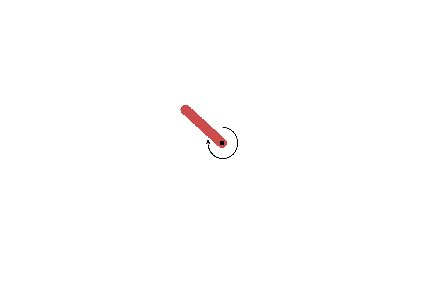
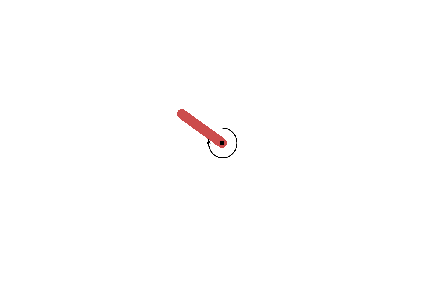
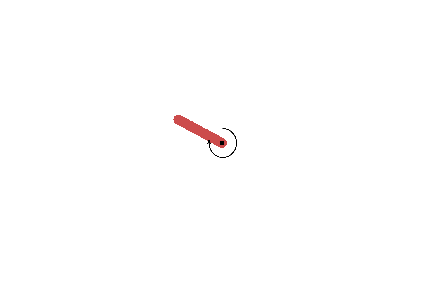
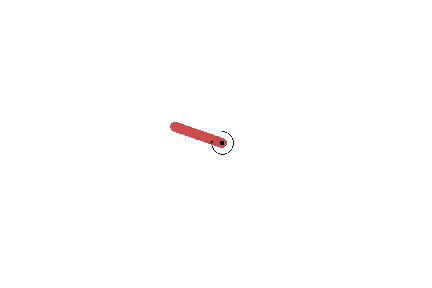
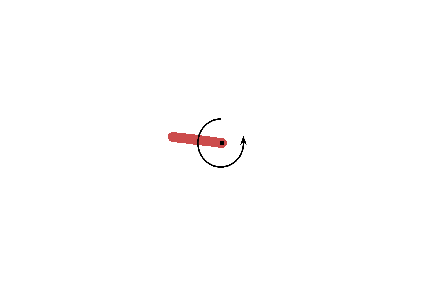
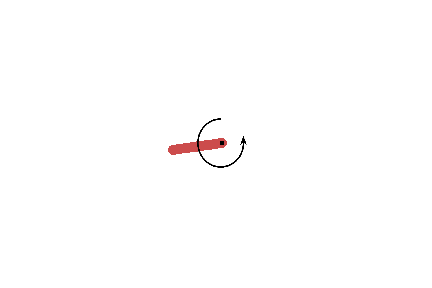
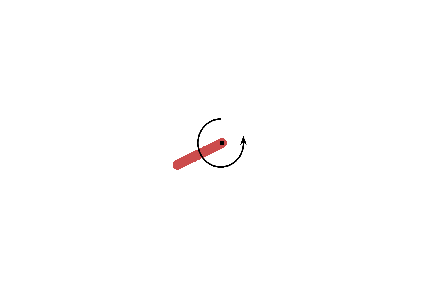
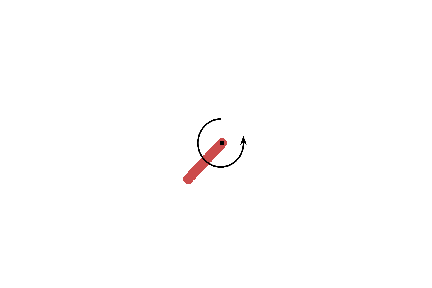
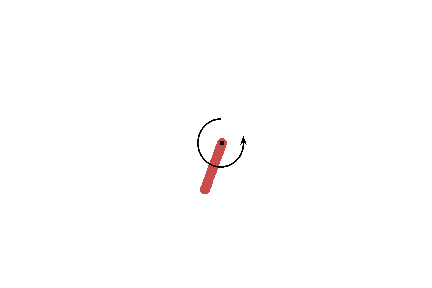
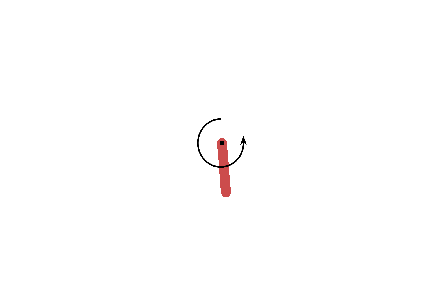
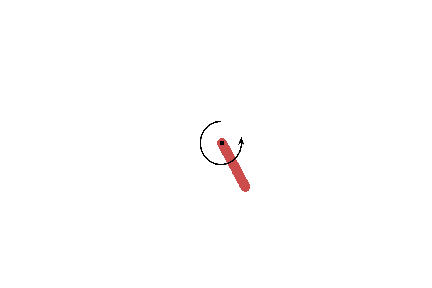
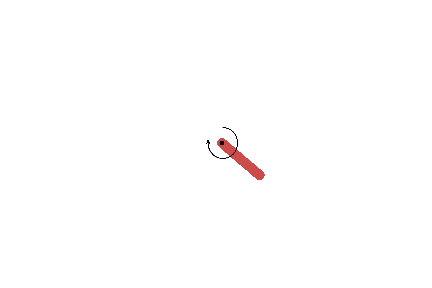
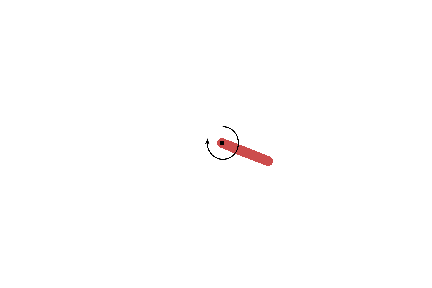
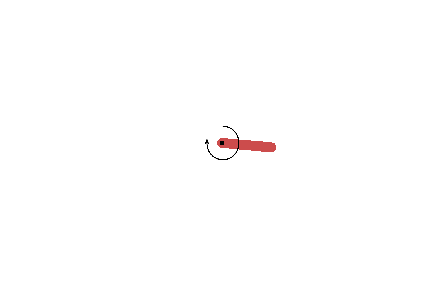
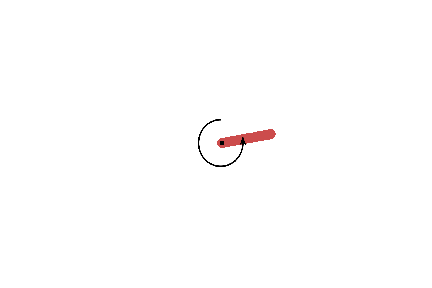
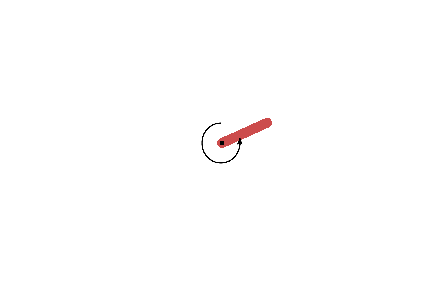
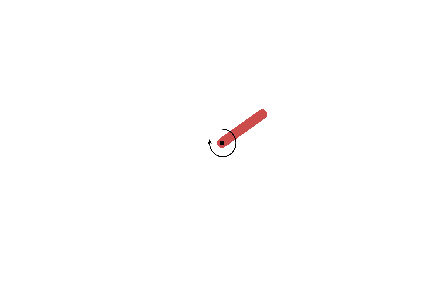
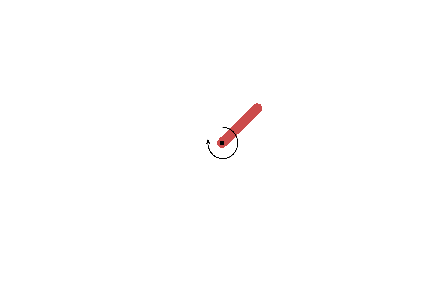
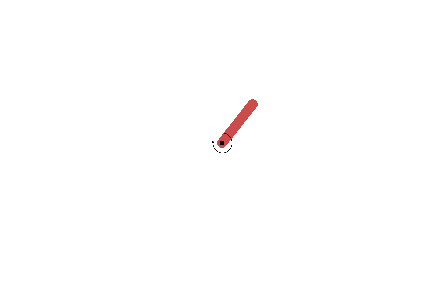
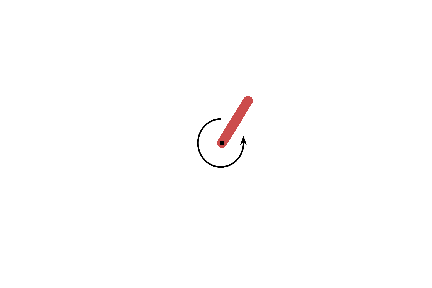
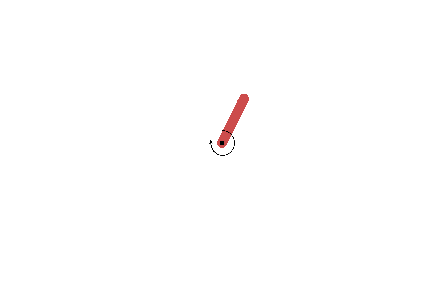
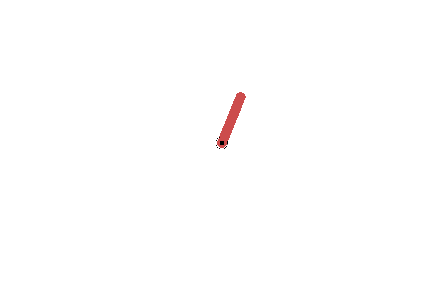
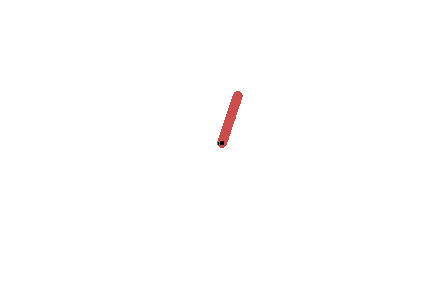
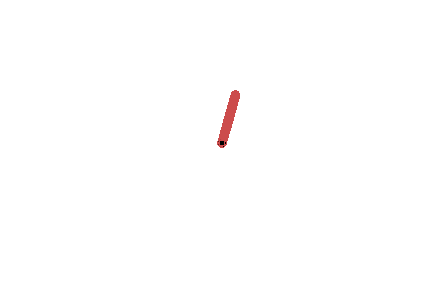
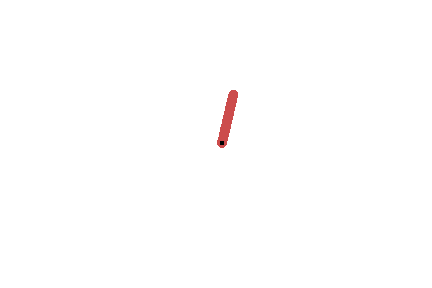
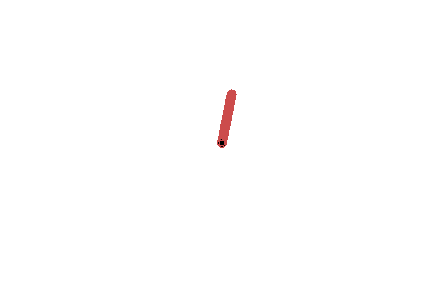
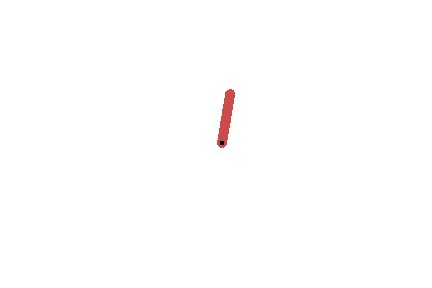
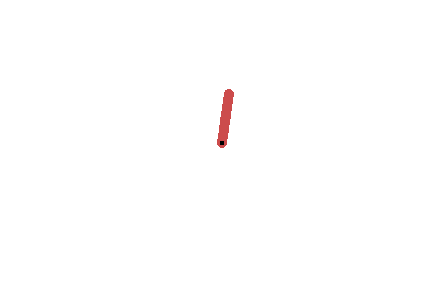
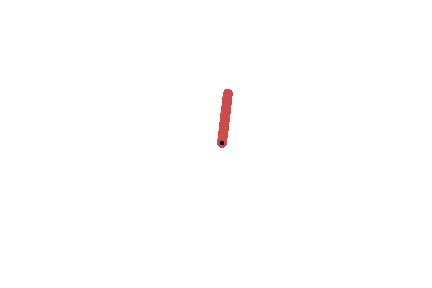
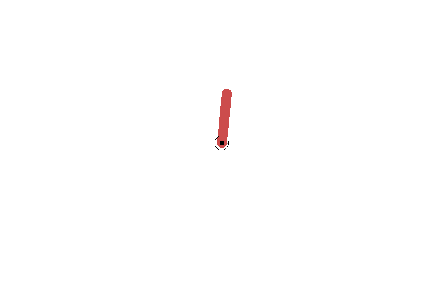
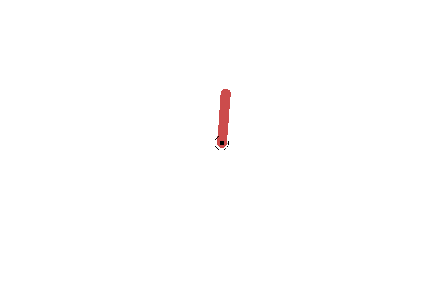
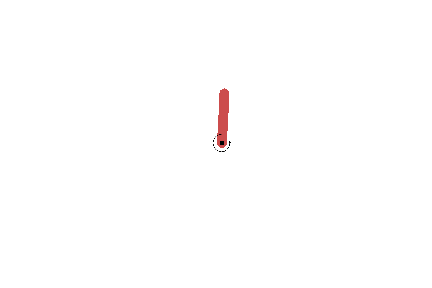
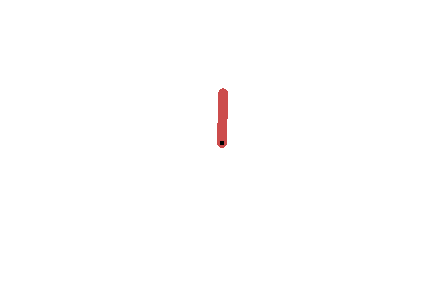
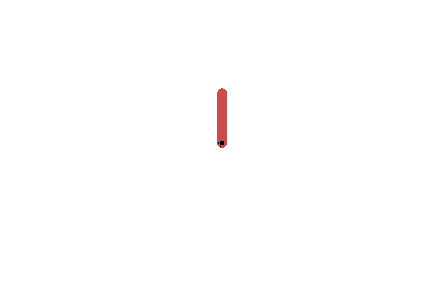
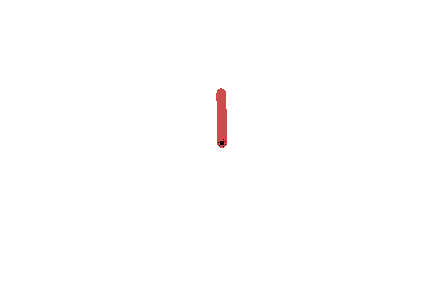
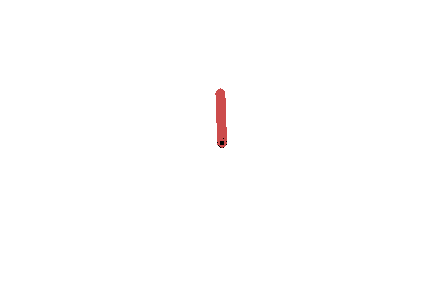
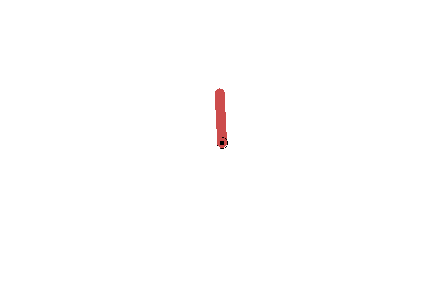
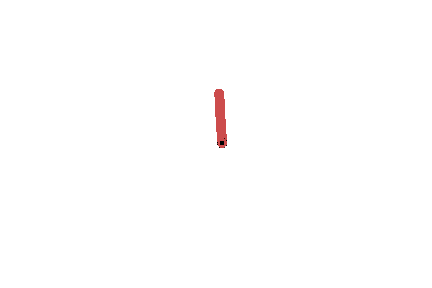
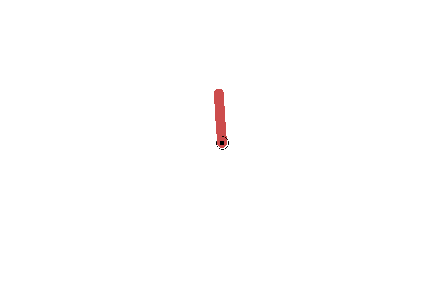
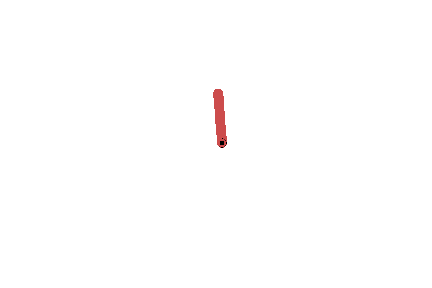
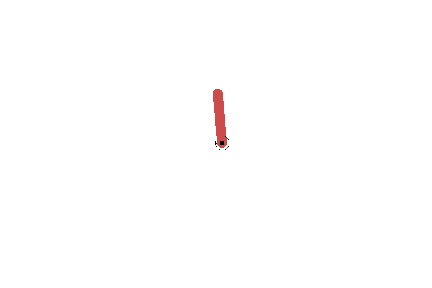
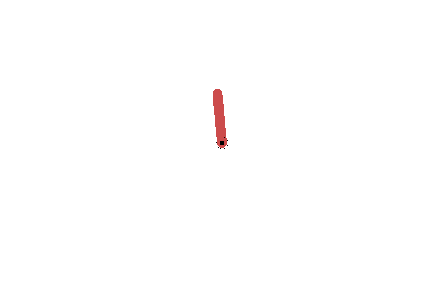
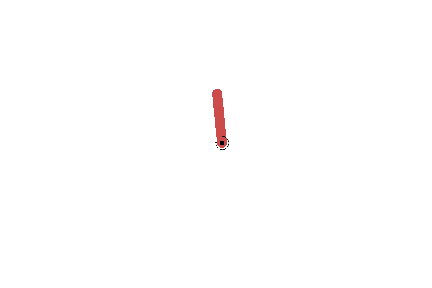
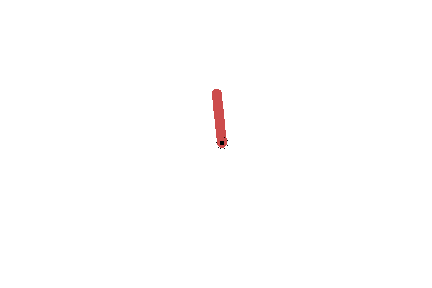
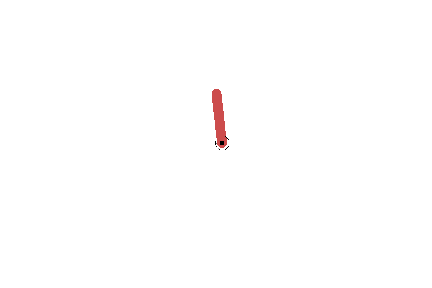
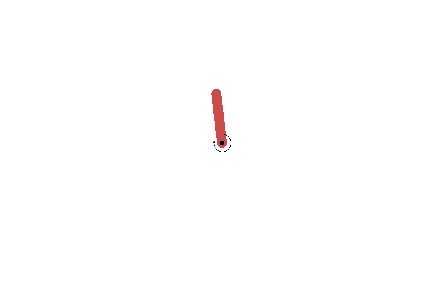
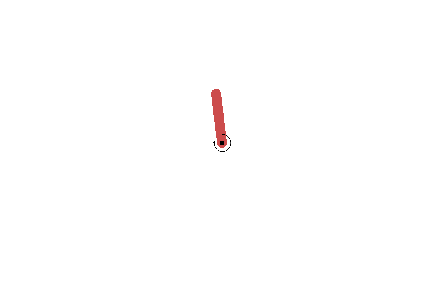
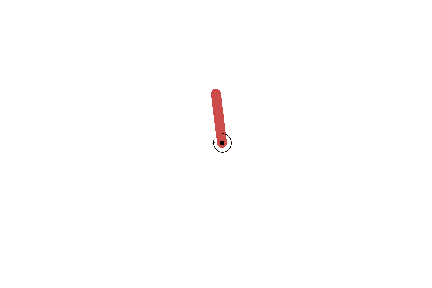
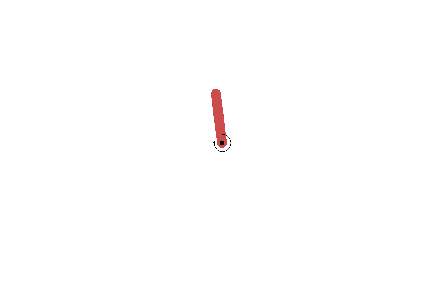
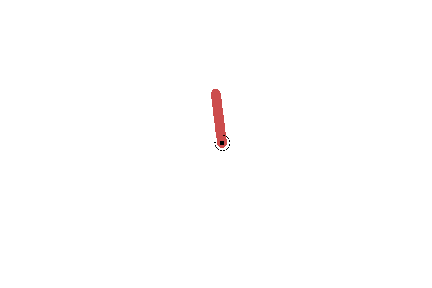
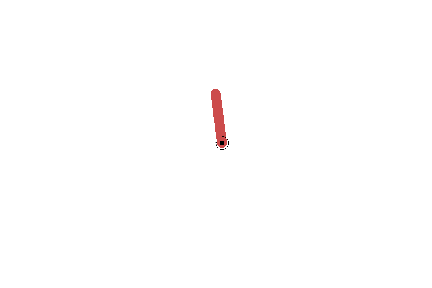
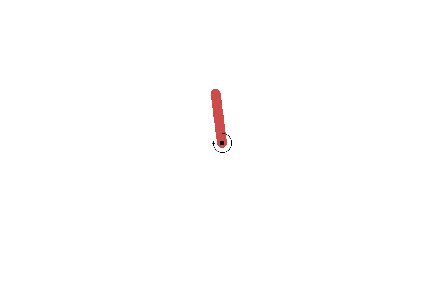
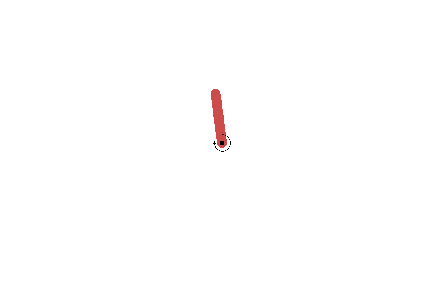
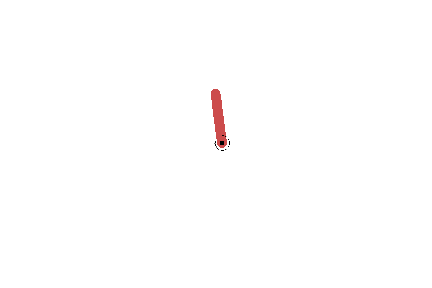
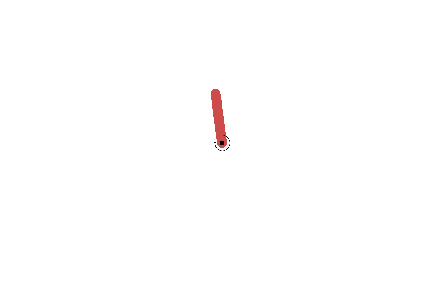
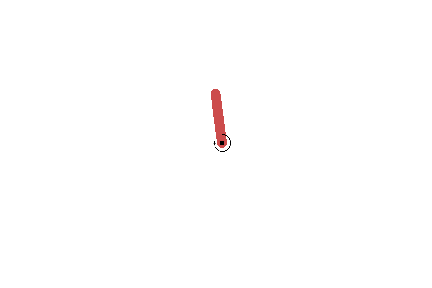
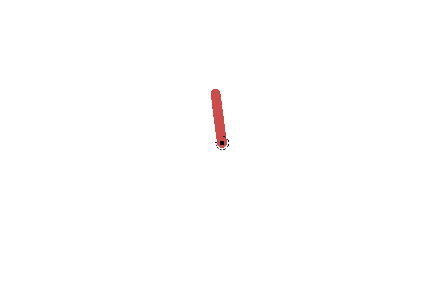
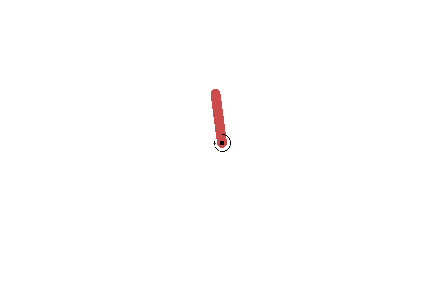
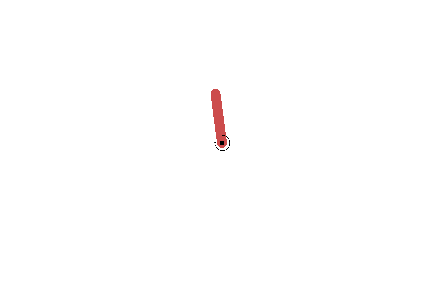
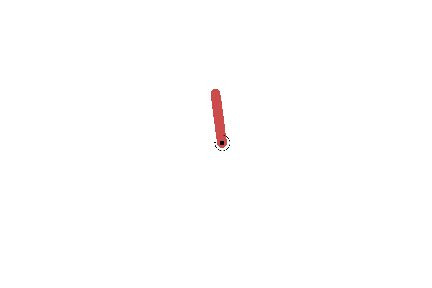
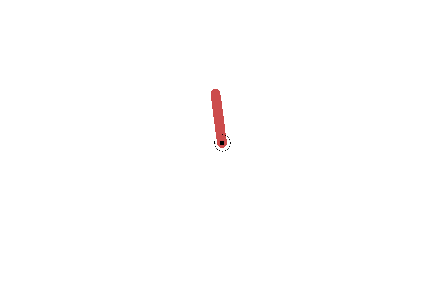
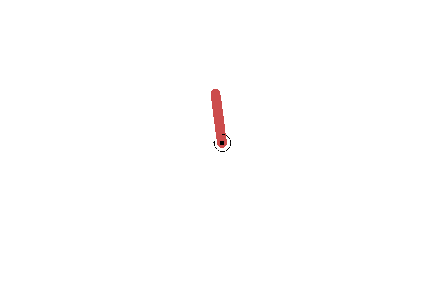
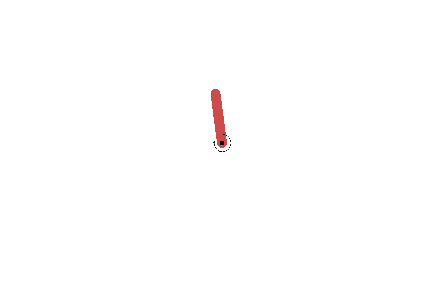
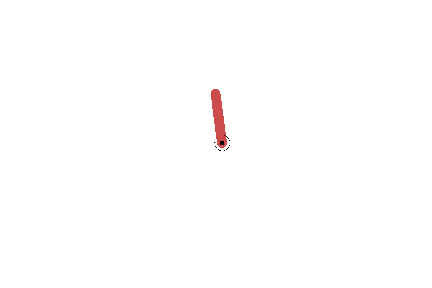
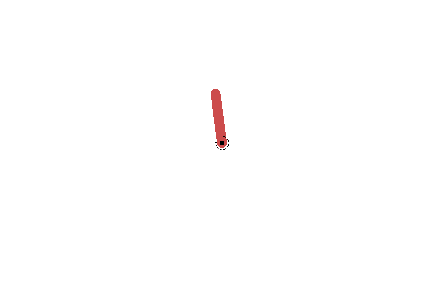
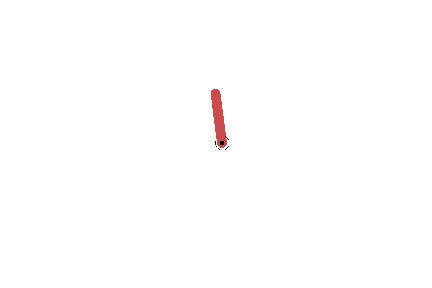
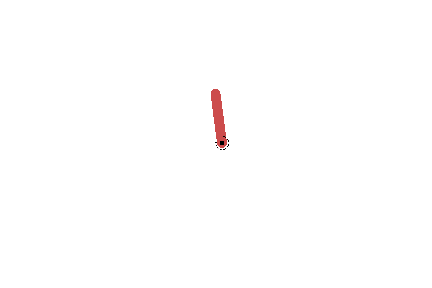
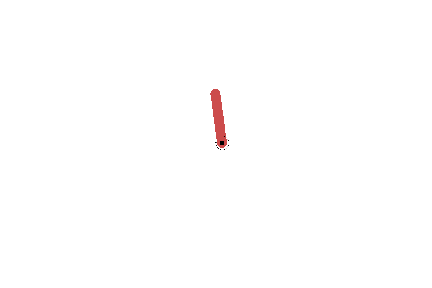
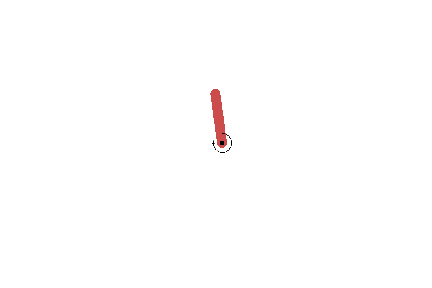
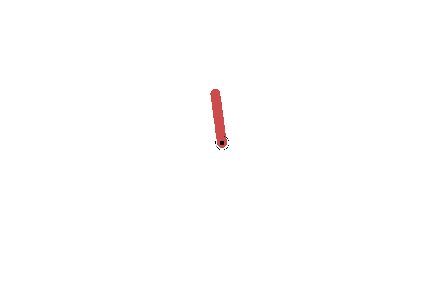
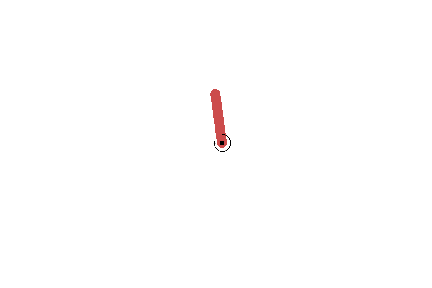
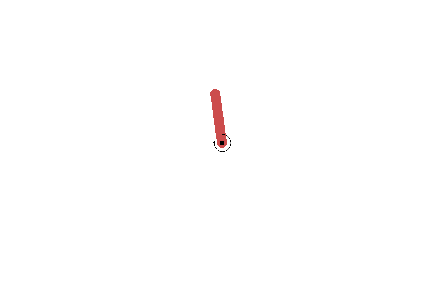
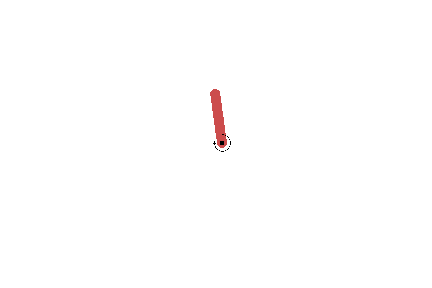
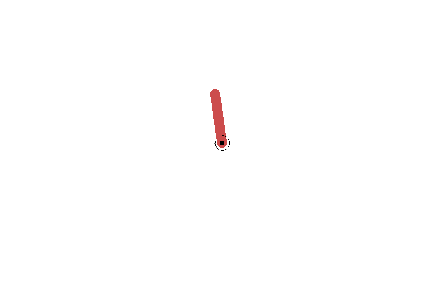
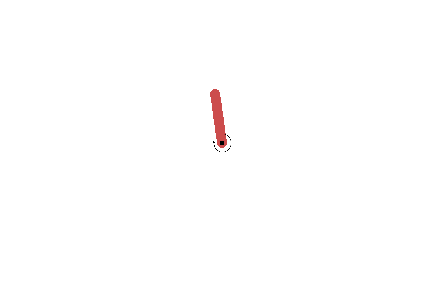
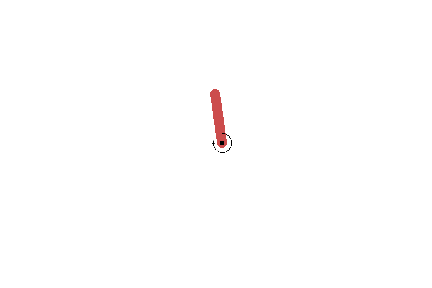
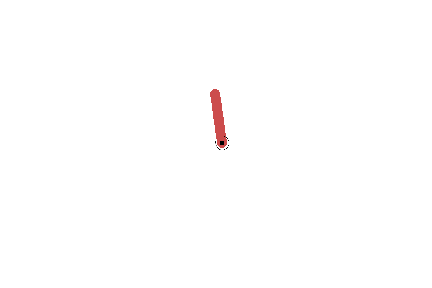
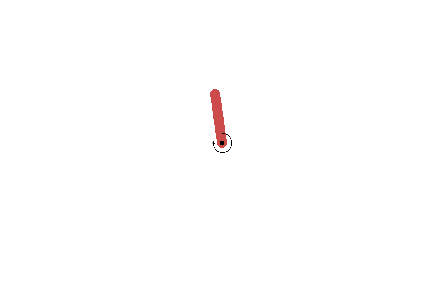
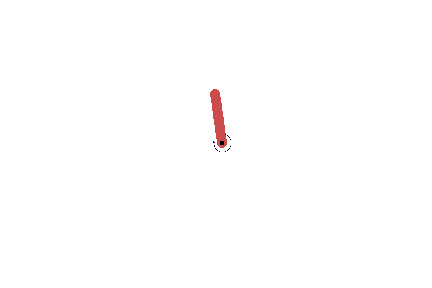
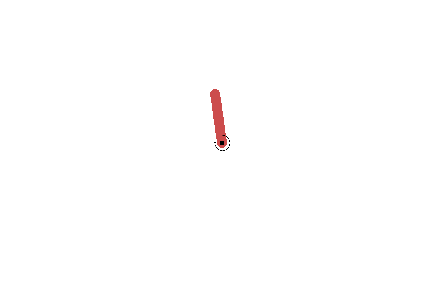
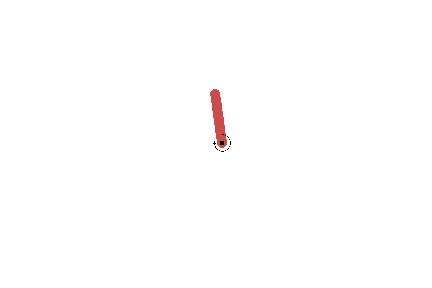
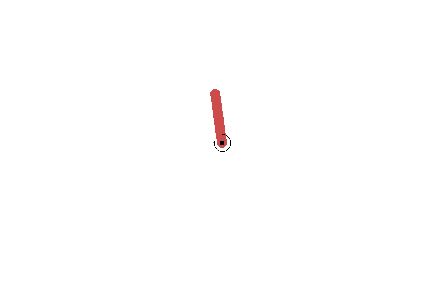
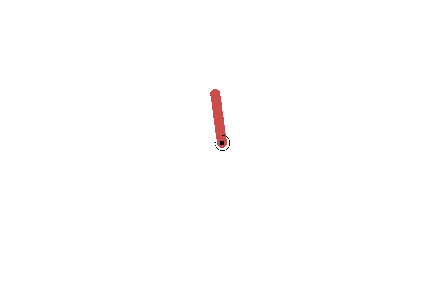
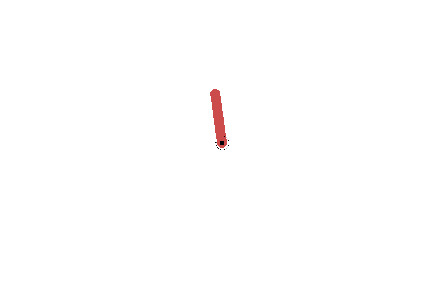
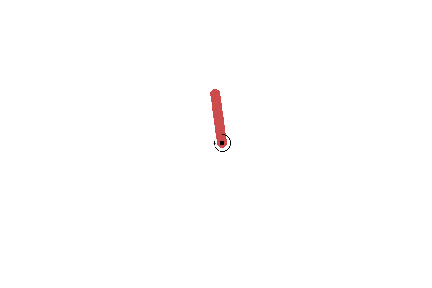
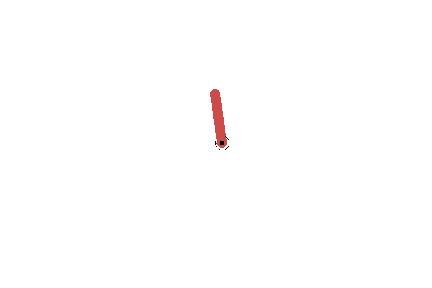
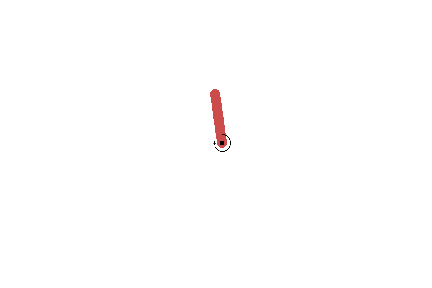
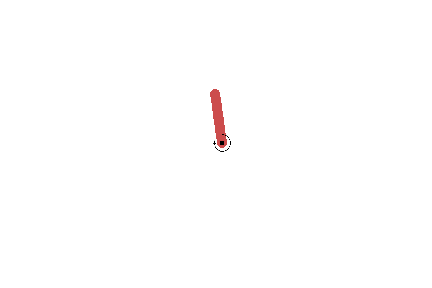
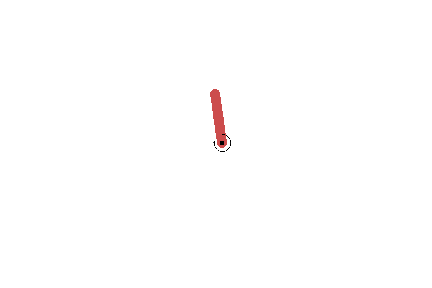
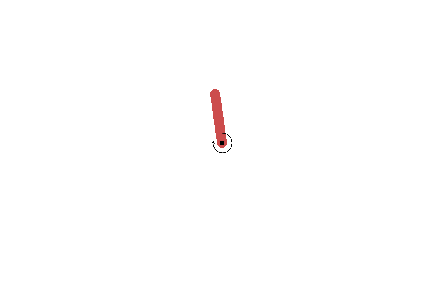
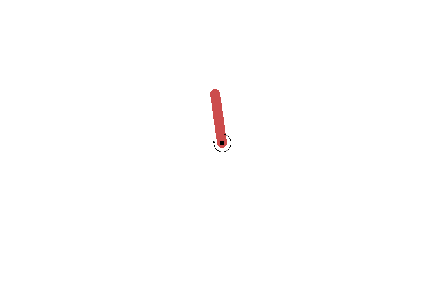
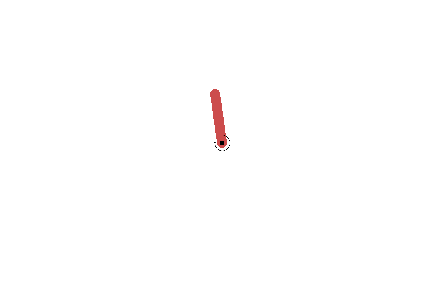
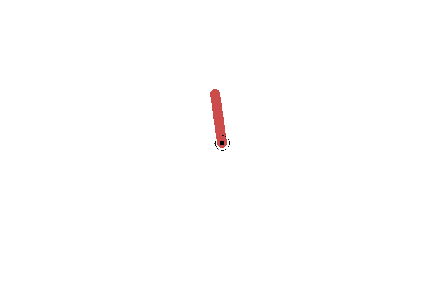
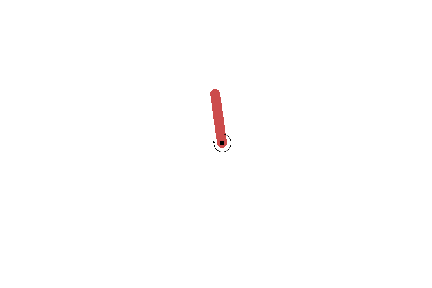
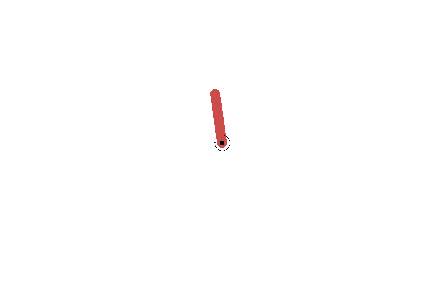
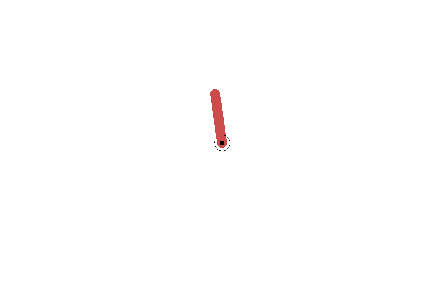
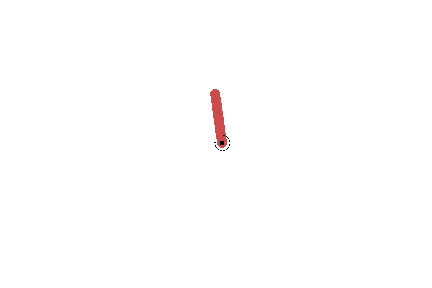
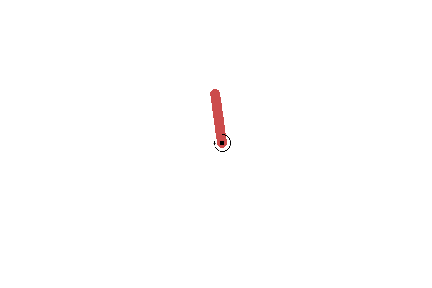
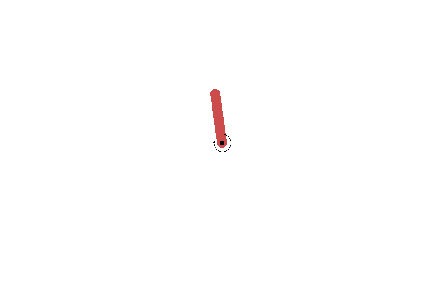
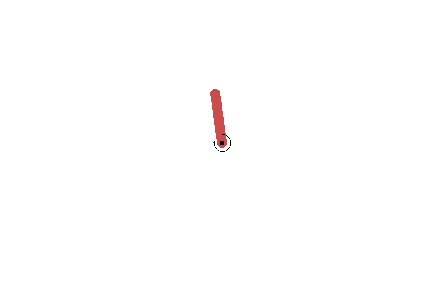
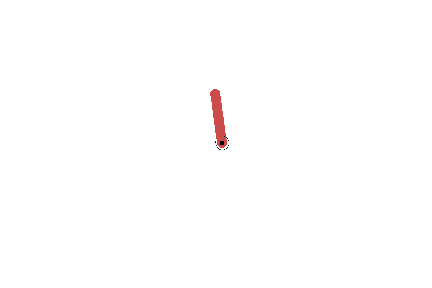
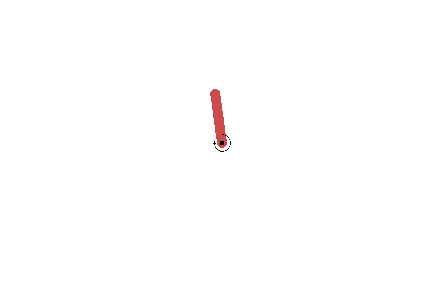
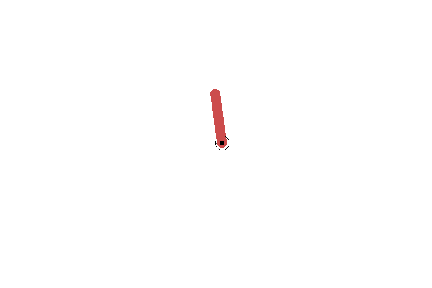
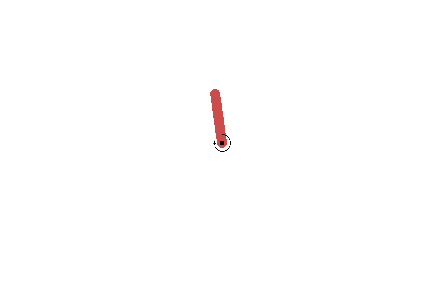
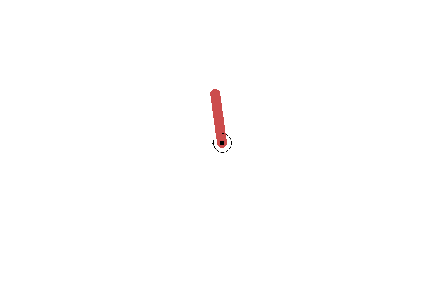
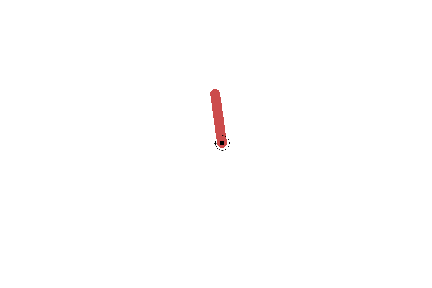
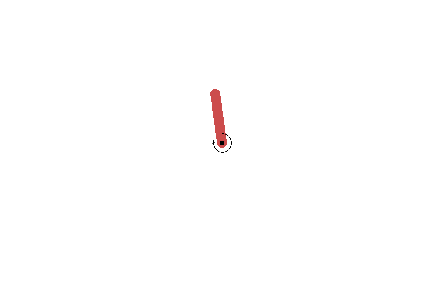
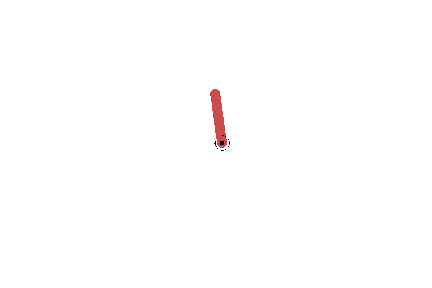
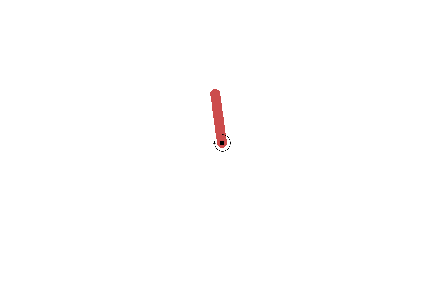
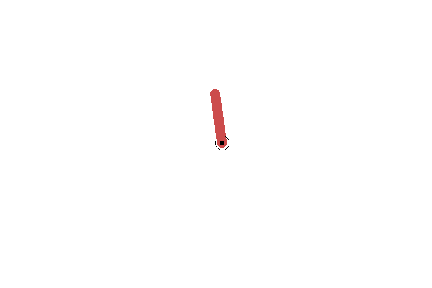
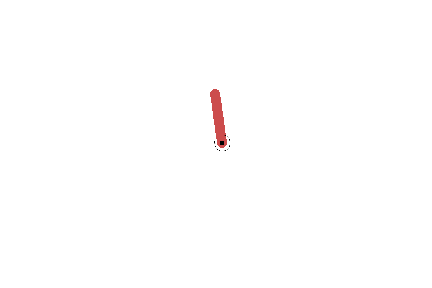
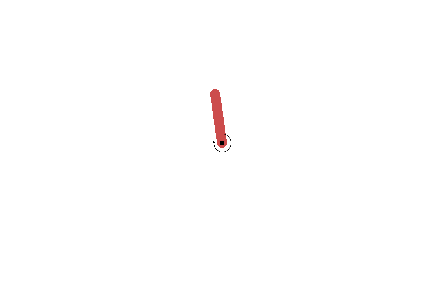
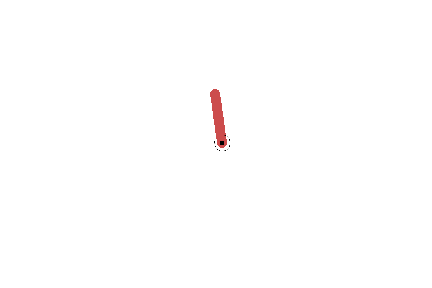
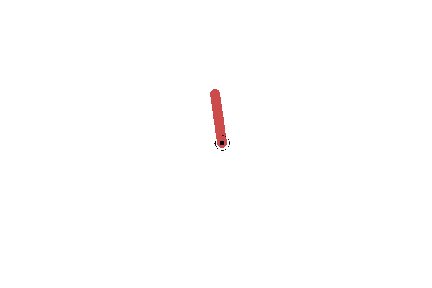
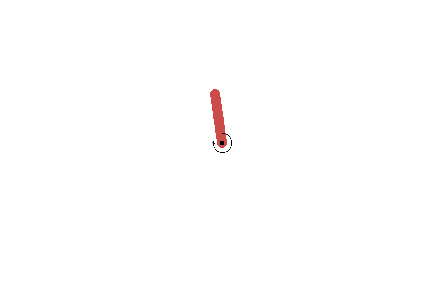
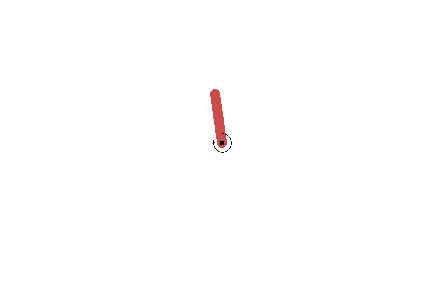
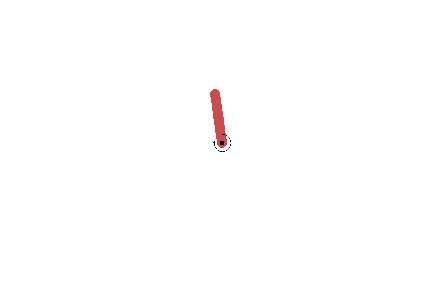
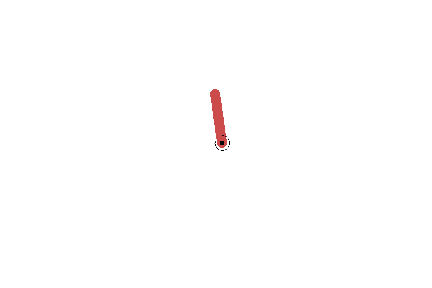
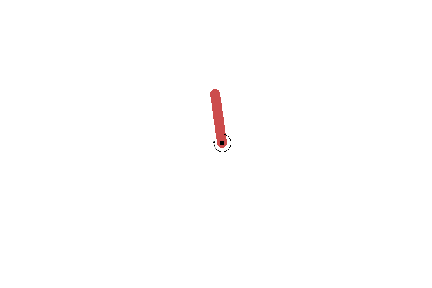
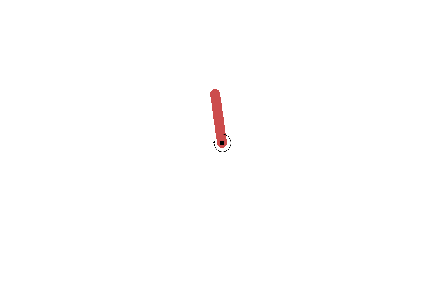
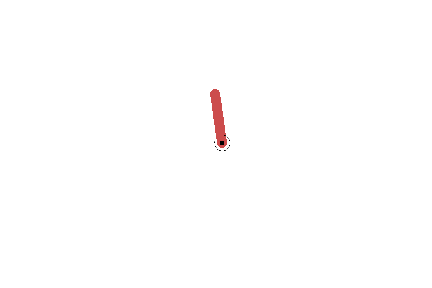
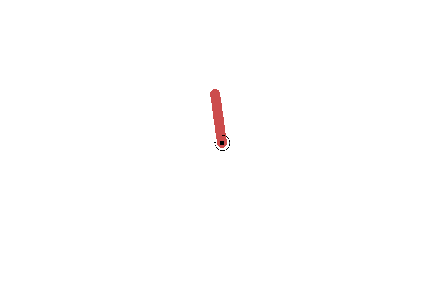
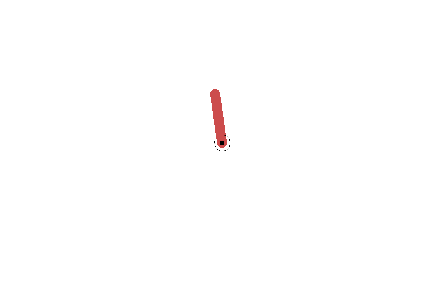
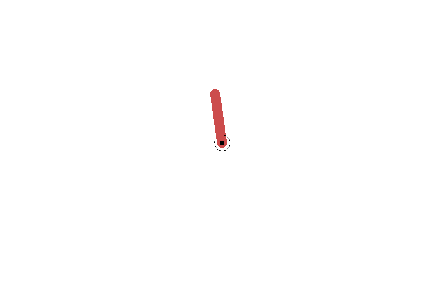
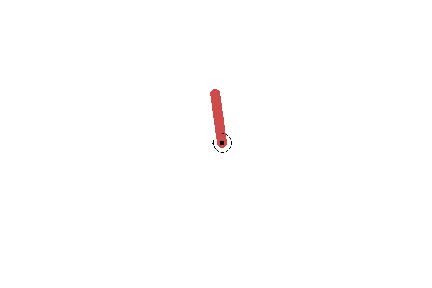
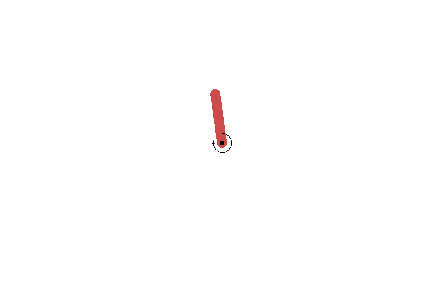
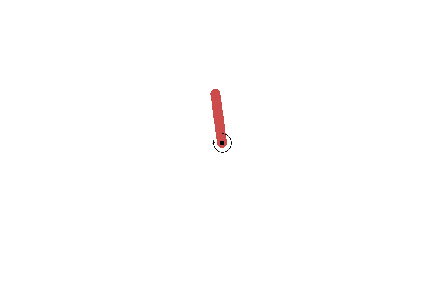
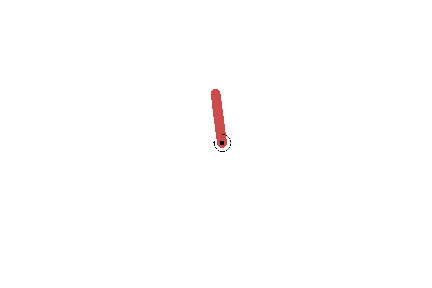
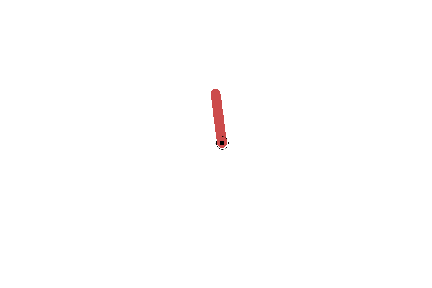
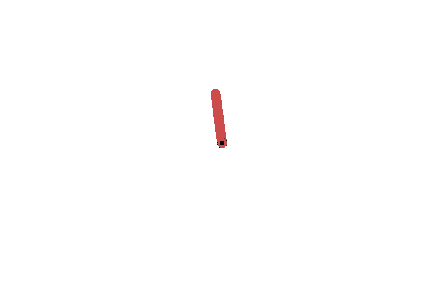
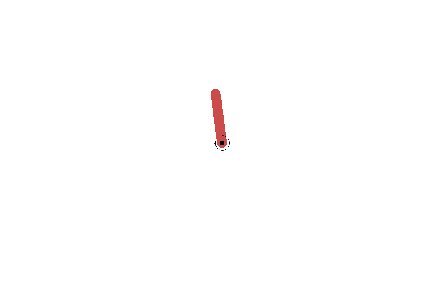
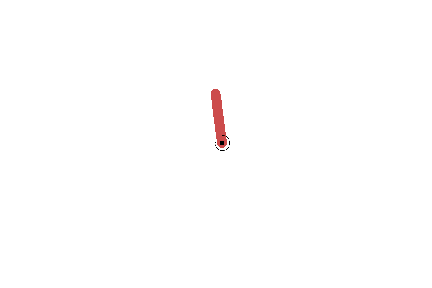
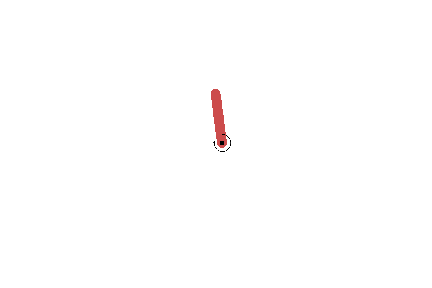
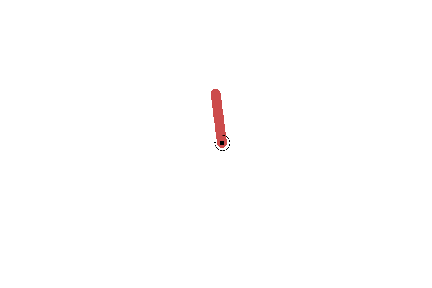
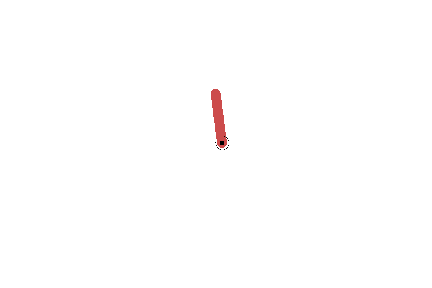
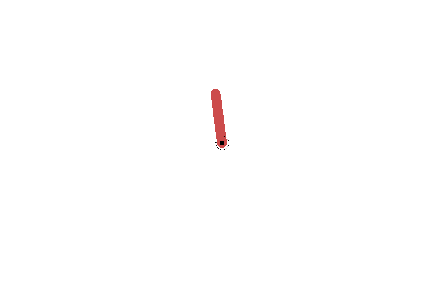
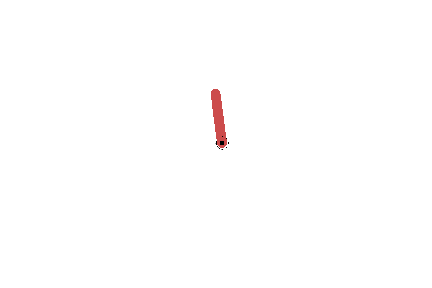
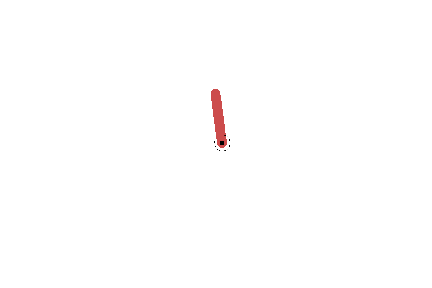
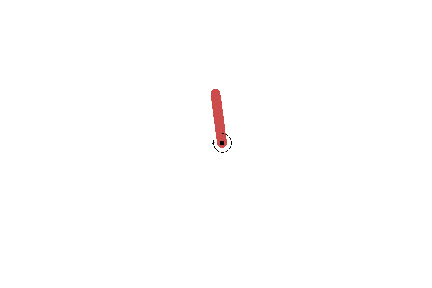
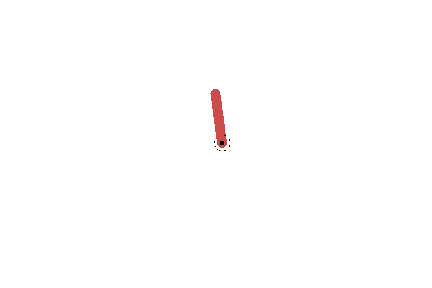
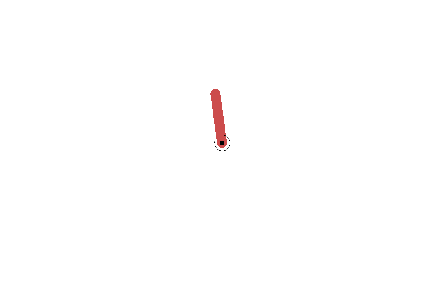
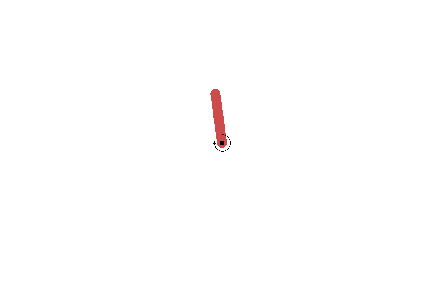
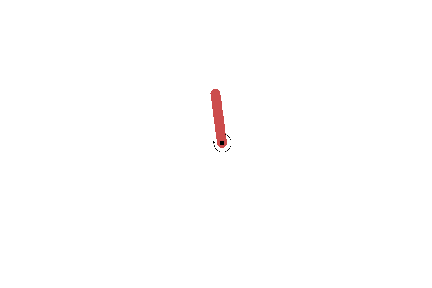
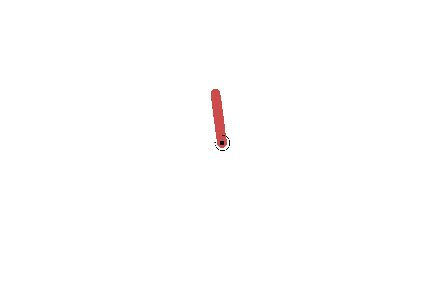
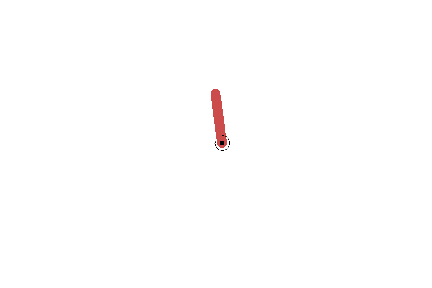
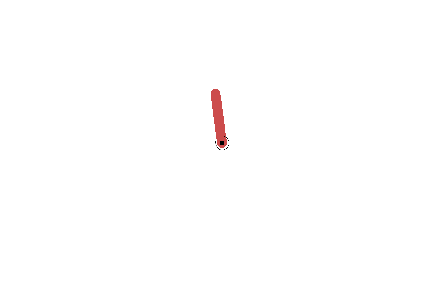
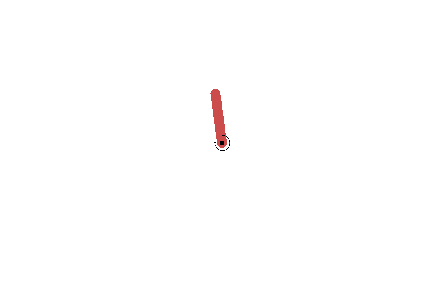
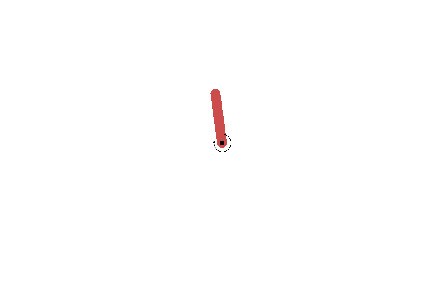
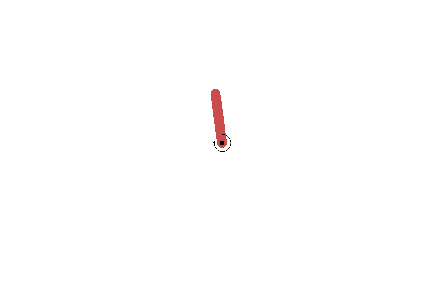
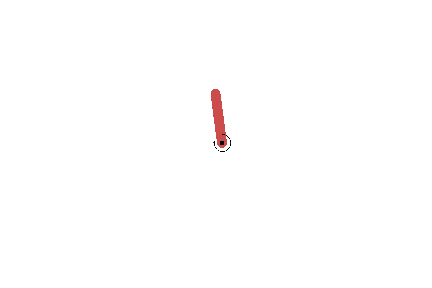
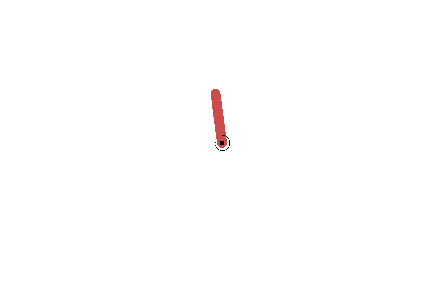
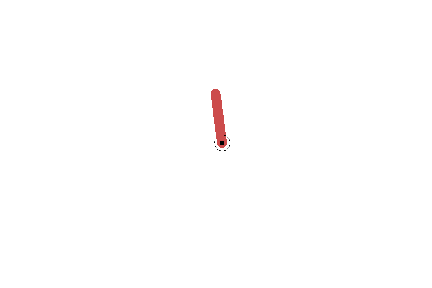
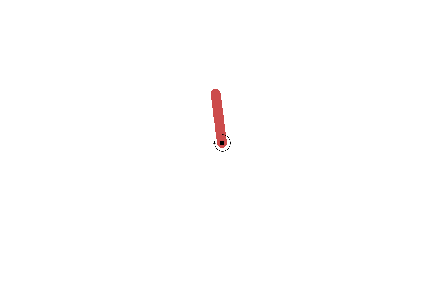
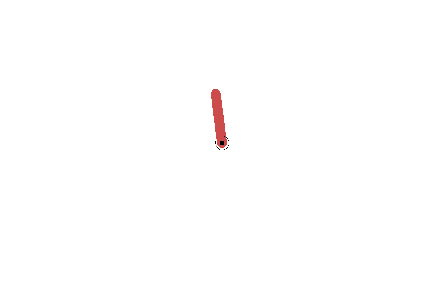
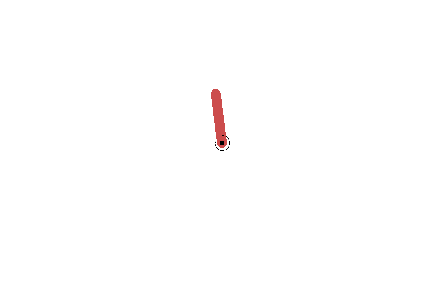
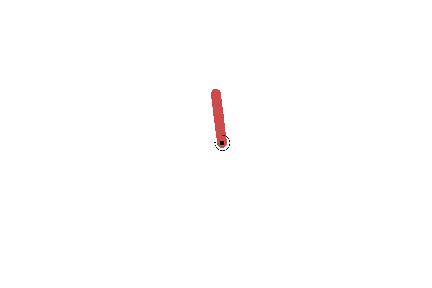
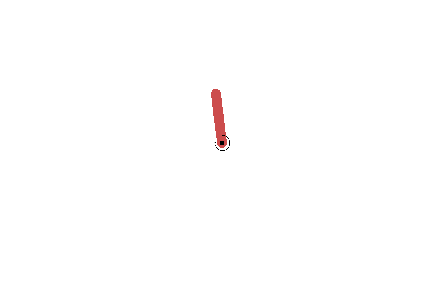
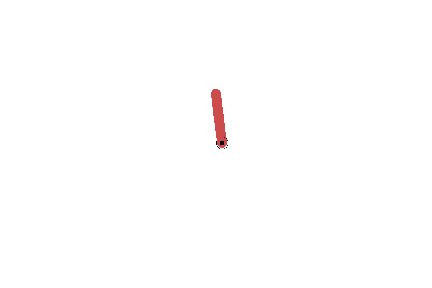
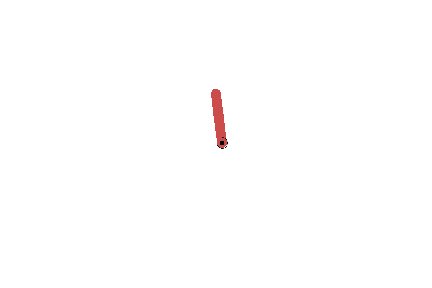
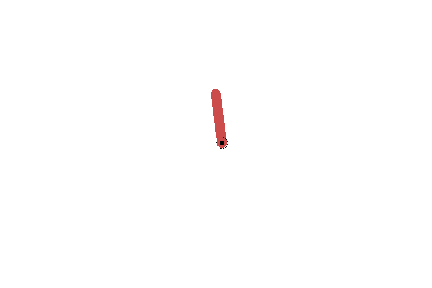
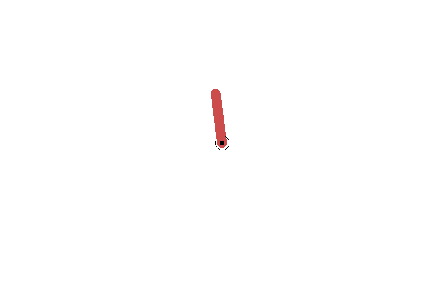
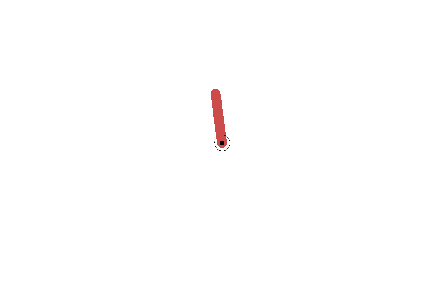
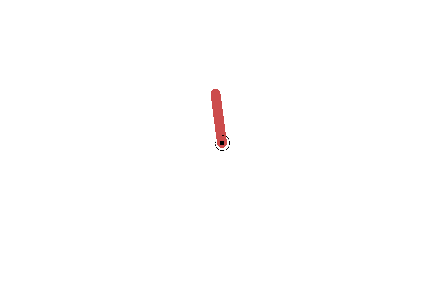
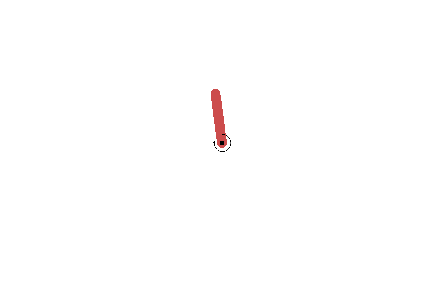
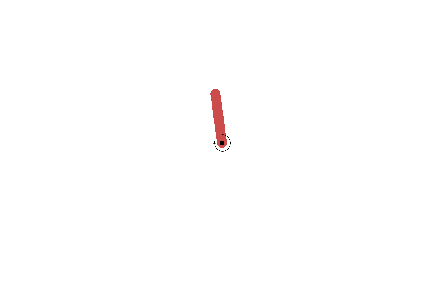
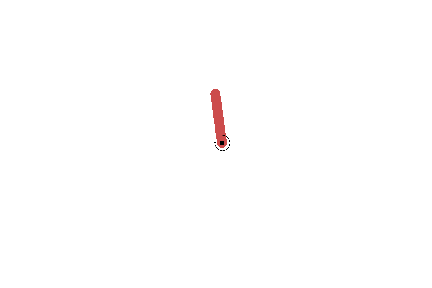
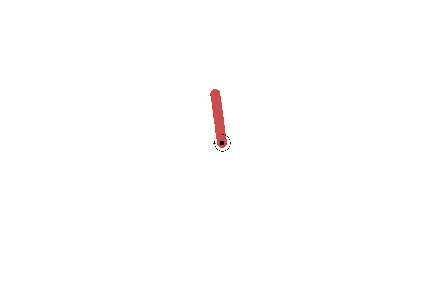
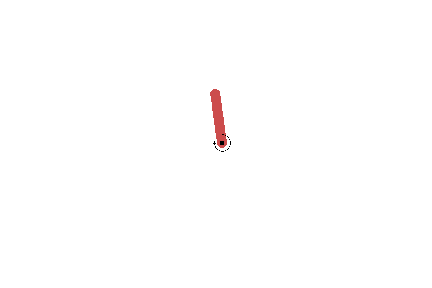
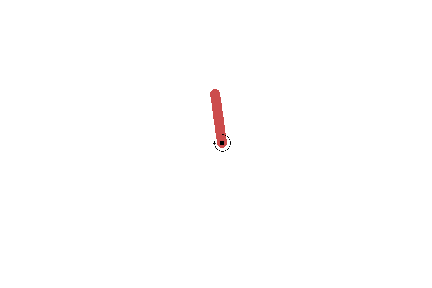
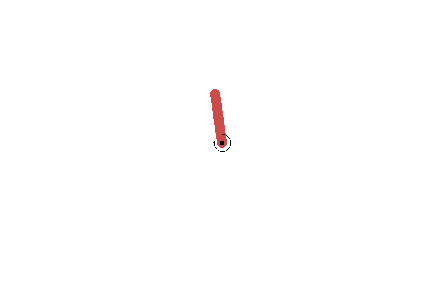
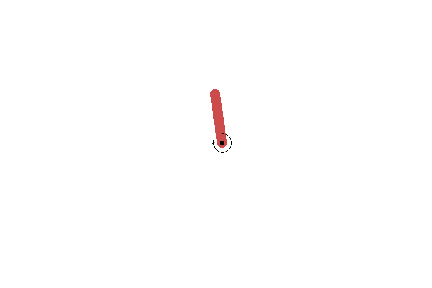
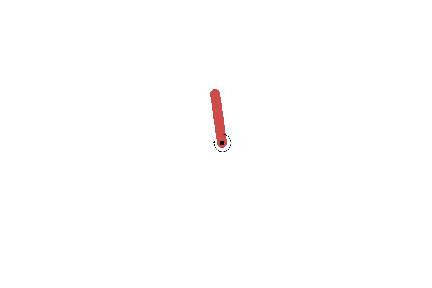
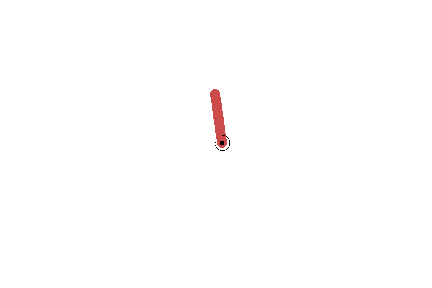
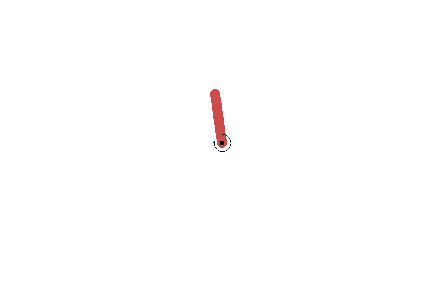
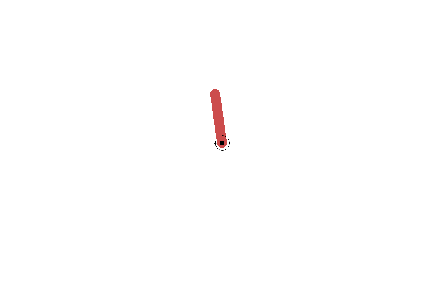
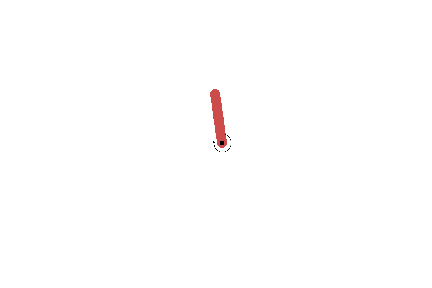
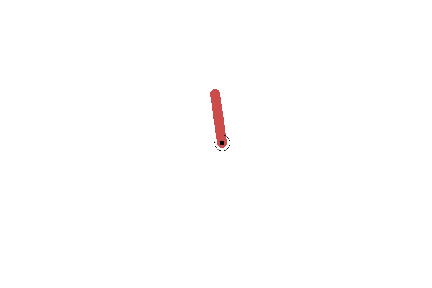

In [11]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth',map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth',map_location='cpu'))

frames = []
state = env.reset()
agent.reset()
for t in range(1000):
    action = agent.act(state)
    frames.append(env.render(mode='rgb_array')) 
    next_state, reward, done, _ = env.step(action)
    state=next_state
    if done:
        break

env.close()
animate_frames(frames)